In [19]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord 
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
import seaborn as sn
import glob
import argparse
import seaborn as sns
import sys
import os
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [20]:
hdu = fits.open("o6cn06o8q_flt.fits/o6cn06o8q_flt.fits")

In [21]:
hdu.info()

Filename: o6cn06o8q_flt.fits/o6cn06o8q_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     236   ()      
  1  SCI           1 ImageHDU       121   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


In [22]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2023-12-12' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    3 / Number of standard extensions                  
FILENAME= 'o6cn06o8q_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [27]:
Flux = hdu[2].data

In [28]:
Flux

array([[2.9415686e+00, 9.8040724e-01, 3.2430497e-05, ..., 3.2785912e-05,
        9.9115193e-01, 9.9115187e-01],
       [9.8046571e-01, 3.2432432e-05, 3.2432432e-05, ..., 3.2777039e-05,
        3.2777039e-05, 3.2777043e-05],
       [9.8052412e-01, 3.2434367e-05, 9.8052412e-01, ..., 3.2768166e-05,
        3.2768166e-05, 3.2768166e-05],
       ...,
       [3.5246732e-05, 1.0655448e+00, 3.5246732e-05, ..., 3.8059043e-05,
        3.8059043e-05, 3.8059043e-05],
       [3.5252051e-05, 3.5252051e-05, 3.5252051e-05, ..., 3.8069316e-05,
        3.8069316e-05, 3.8069316e-05],
       [7.5252272e-02, 3.5257373e-05, 3.5257370e-05, ..., 3.8079601e-05,
        3.8079601e-05, 3.8079597e-05]], dtype='>f4')

In [29]:
nx, wav0, i0, dwav = [hdu[1].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
wavs = wav0 + (np.arange(nx) - (i0 - 1)) * dwav

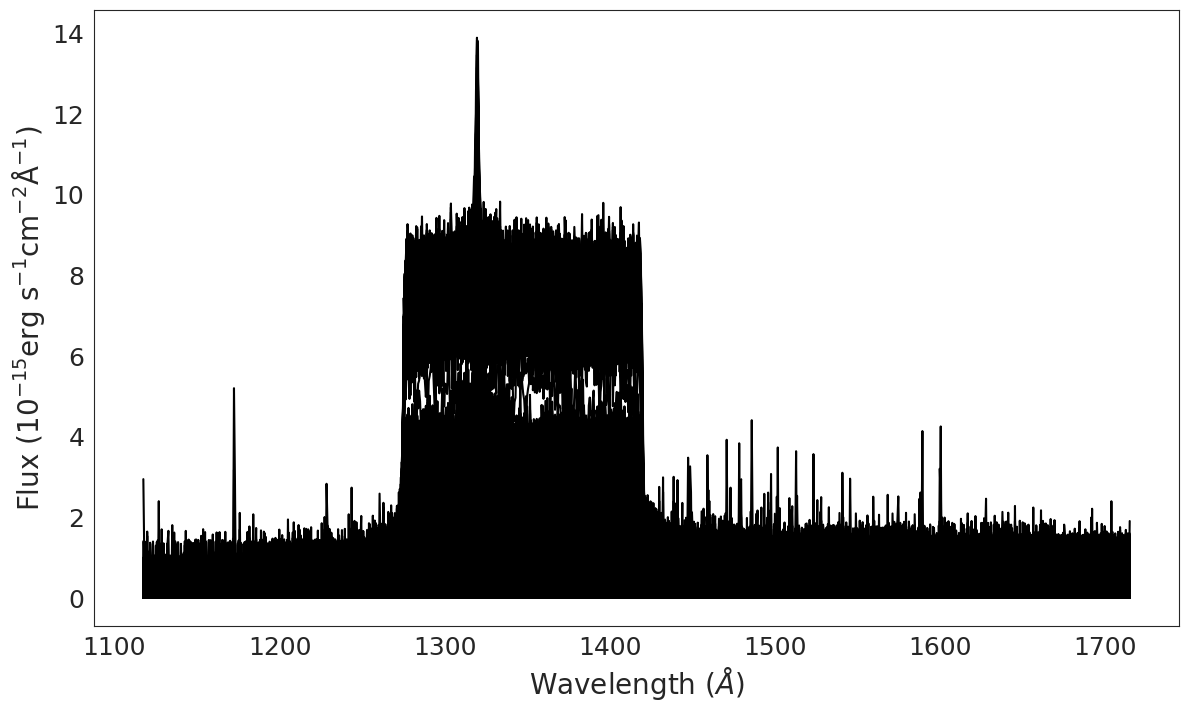

In [30]:
# Plotting
color_palette = sns.color_palette('Paired', 12)
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlabel(r'Wavelength $(\AA)$', fontsize=20)
    ax.set_ylabel(r'Flux ($\mathrm{10^{-15} erg\ s^{-1} cm^{-2} \AA^{-1}}$)', fontsize=20)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.plot(wavs, Flux, c="black")                